# K-means

The **K-means** algorithm is one of the most popular clustering methods. Given a set of $n$ observations $\{x_1,x_2,\dots,x_n\}$, where $x_i\in\mathbb{R}^p$, $i=1,2,\dots,n$, K-means creates a partition of $K$ clusters of $\mathbb{R}^p$ by minimizing the total variance within each cluster:

$$\min_CW(C)=\min_C\sum_{k=1}^Kn_k\sum_{C(i)=k}\|x_i-m_k\|_2^2,$$

where $m_k$ is the centroid of group $k$, $1\leq C(i)\leq K$ is the cluster the observation $x_i$ belongs to, and $n_k=\sum_{i=1}^n\mathbb{1}(C(i)=k)$.

By the way, this notebook is a modified version of a notebook created by **ClimateAI** (https://climate.ai/). Now, let us import some libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles

## Toy Dataset

Let us experiment with a toy dataset. We will use a built-in function from the `sklearn` library to generate some *blobs*.

In [2]:
K = 2 
N = 100 
dimension = 2 
X, y = make_blobs(n_samples=N*K, centers=K, n_features=dimension, random_state=3)

Let us take a peek into the data we generated.

In [4]:
print('Dataset:')
print(X)
print('Labels:')
print(y)

Dataset:
[[ 8.88195994e-01  4.41112448e+00]
 [ 3.67547163e-01  3.42549161e+00]
 [-4.21069087e+00 -1.25739072e+00]
 [ 5.85067996e-01  3.62268619e+00]
 [-2.16225458e+00  5.42814377e-01]
 [-3.83108938e+00  1.84312571e+00]
 [ 2.24942910e+00  4.31194285e+00]
 [ 1.89024377e+00  2.86941982e+00]
 [ 6.94373358e-01  4.31408682e+00]
 [ 9.20720453e-01  3.63576867e+00]
 [-4.70700019e-01  5.57158341e+00]
 [ 1.65912133e+00  4.41204316e+00]
 [ 1.81718201e-01  5.50794891e+00]
 [-5.46813455e+00 -9.27169722e-01]
 [ 4.70598104e-01  2.61647914e+00]
 [ 6.59687292e-01  2.41981542e+00]
 [-3.11468967e+00  8.57972760e-01]
 [-6.12697748e+00 -9.43170847e-01]
 [-3.76352420e+00 -6.75854231e-01]
 [-1.01443550e+00  3.20218134e+00]
 [ 2.02914149e+00  5.01575429e+00]
 [-4.09694116e+00  1.31433159e+00]
 [-4.10281303e+00 -7.48211363e-01]
 [-4.09087071e+00  1.00198435e+00]
 [-2.28165277e-01  3.53653954e+00]
 [ 1.85180195e+00  4.65507536e+00]
 [-4.40122731e-03  4.43354988e+00]
 [ 2.12414555e+00  5.28234711e+00]
 [ 8.185433

So each row of $X$ is a point in $\mathbb{R}^2$. The labels $y$ are a list of 0's and 1's. Let us visualize this.

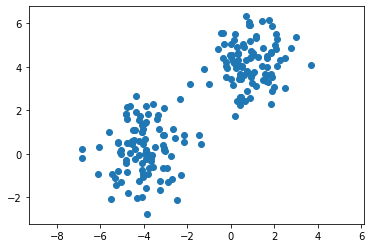

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

We can also plot the data with *ground truth* colors to see what a perfect clustering algorithm should do.

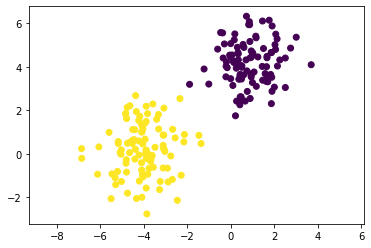

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.axis('equal')
plt.show()

## Solving K-Means

Now we will find the minizing partition $C^\star$ of our dataset. Let us use the implementation from the package `sklearn`.

In [7]:
K = 2
kmeans = KMeans(n_clusters=K).fit(X)

We can extract labels determined by this algorithm.

In [8]:
kmeans.labels_

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int32)

The above describes the optimal partition $C^\star$, that is, $C^\star = \{C_1,C_2\}$. If a point gets the label $0$ in the list above, then it belongs to $C_1$, whereas if it gets the label $1$ it belongs to $C_2$. By the way, we can also get the centroids.

In [9]:
kmeans.cluster_centers_

array([[-4.03900883,  0.19275413],
       [ 0.86365548,  4.17204079]])

These are the optimal $m_1$ (first column) and $m_2$ (second column) from the definition of K-Means. Now let us plot everything together: We'll plot our dataset $X$, color its points by the labels above, and we will also plot the cluster centers on the same scatter plot.

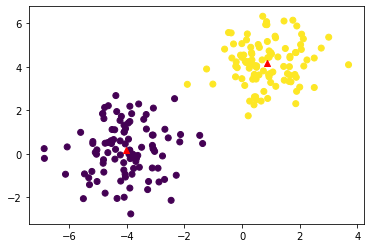

In [11]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='^', c='r')
plt.show()

## Changing the Number of Clusters

K-means requires us to choose a number of clusters. If we choose the wrong number of clusters, we will get bad results. This is an issue if we are dealing with high-dimensional data with an unknown *ground truth*: in practice, this will frequently be the case.

Let us change the $K$ parameter in what we did above and see what happens.

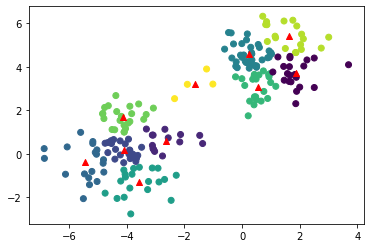

In [12]:
K = 10 
kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='^', c='r')
plt.show()

Whichever $K$ we choose we get some "optimal" partition. If we do not choose $K$ correctly, this partition is not very meaningful. 

Speaking of $K$, how do we choose the *optimal* number of clusters? There are several approaches, being **the elbow method** the most popular. The idea behind this heuristic is that if there are actually $K^\star$ distinct groupings of the observations, then for$K<K^\star$ the clusters returned by the algorithm will each contain a subset of the true underlying groups. That is, the value of the total variance within cluster $W$ will tend to decrease substantially with each successive increase in the number of specified clusters, however, for $K>K^\star$, one of the estimated clusters must partition at least one of the natural groups into two subgroups, therefore, this will tend to provide a smaller decrease in $W$ as $K$ is further increased. The elbow method estimates $K^\star$ by identifying a “kink” in the plot of $W$ as a function of $K$. 

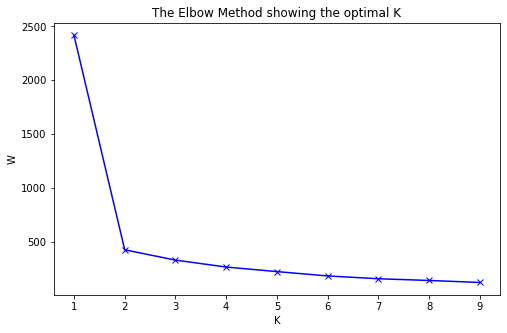

In [13]:
W = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    W.append(kmeans.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, W, 'bx-')
plt.xlabel('K')
plt.ylabel('W')
plt.title('The Elbow Method showing the optimal K')
plt.show()

Clearly, the optimal $K$ is two, as expected.

## 'Non Blobby' Data

Another issue with K-means is that it is easy to construct datasets that the algorithm will not be able to handle.

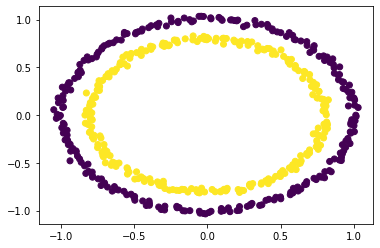

In [14]:
X1, y1 = make_circles(n_samples=500, noise = 0.02, random_state = 2) 
plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.show()

Since K-means operates by taking Euclidean means, we anticipate that it cannot find the *true* clustering structure, no matter what $K$ we choose. Let us see this.

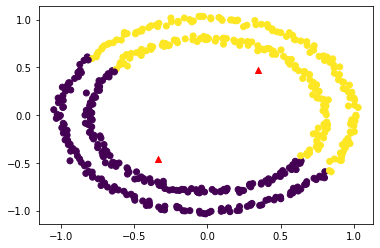

In [17]:
K = 2
kmeans = KMeans(n_clusters=K).fit(X1) 
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='^', c='r')
plt.show()

## Issues with K-means

We have observed the following problems:

- Users must choose $K$. This might not always be obvious and it is possible that there is not even a single true value for $K$. 
- By its nature, K-means does not handle data which is not *blobby* very well.

## Bibliography

[1] *Hastie, T., Tibshirani, R., Friedman, J. H., "The elements of statistical learning: data mining, inference, and prediction," New York, Springer, 2009.*